## Sampling
- In statistics, the set of all individuals relevant to a particular statistical question is called a population.
- A smaller group selected from a population is called a sample. When we select a smaller group from a population we do sampling. 
- Whether a set of data is a sample or a population depends on the question we're trying to answer. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
wnba = pd.read_csv('wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


### Sampling Error

A metric specific to a population is called a parameter, while one specific to a sample is called a statistic.

Sampling Error = parameter - statistic

In [10]:

parameter = wnba['Games Played'].max()

# sample randomly 30 players from the population, set random_state =1 for making resuklts reproducible 
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic

print('parameter: ' , parameter)
print('statistic: ', statistic)
print('sampling_error: ', sampling_error)

parameter:  32
statistic:  30
sampling_error:  2


### Simple Random Sampling

- In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error.

- To make our samples representative, we can try to give every individual in the population an equal chance to be selected in our samples, which is sample randomly.


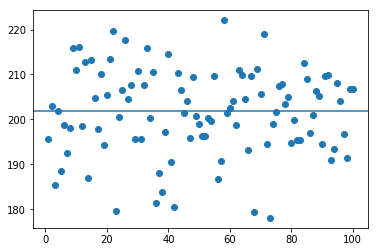

In [20]:
# Visualize the discrepancy between a parameter and its cooresponding statistics

sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(100, random_state=i)
    sample_means.append(sample.mean())

# display all the 100 sample means using a scatter plot
plt.scatter(range(1,101), sample_means)

# draw a horizontal line that represents the average number of points in the population
plt.axhline(population_mean)

- We can see that the sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population.

- Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.

- When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

### Stratified Sampling

- We can organize our data set into different groups, and then do simple random sampling for every group. 
- This sampling method is called stratified sampling, and each stratified group is also known as a stratum.

In [23]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the player position in five strata and then do simple random sampling on every stratum
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

# loop through the strata and for each stratum sample 10 observations 
points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
    # find the mean points per game using the sample
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)
print(position_most_points)

C


### Quota Sampling

In [25]:
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

- Approximately 72.7% of the players had more than 23 gamnes
- Quota sampling: one solution to this problem is to be mindful of the proportions in the population and sample in a non-random way. For instance, we can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations. 
- Another way to view quota sampling is as a non-random version of stratified sampling. Quota sampling can be useful when proportions of certain categories in the population are known. For instance, if we're trying to answer demographical questions about a country (or a city), we can use census data to find the proportions of males and females in the population, and then sample accordingly.

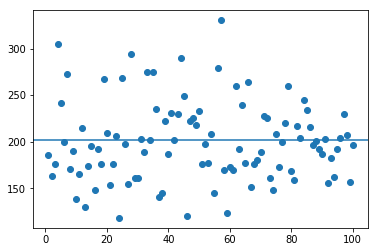

In [24]:
# stratify the data set by the number of games played

under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

quota_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    # concat all the sample observations into one final sample
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    quota_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), quota_sampling_means)
plt.axhline(wnba['PTS'].mean())

#### Choose the Right Strata

- The poor performance in the case of quota sampling was caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

A few guidelines:

1. Minimize the variability within each stratum.
2. Maximize the variability between strata.
3. The stratification criterion should be strongly correlated with the property you're trying to measure.





### Cluster Sampling

- list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

In [26]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

# Collect the data from each cluster without sampling the clusters. 
# Create a new DataFrame object that stores the data collected from all clusters.

sample = pd.DataFrame()
for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

where a data scientist can use sampling ？

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows, and perform your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified or quota sampling.

Let's consider a different situation. It could be that you need to collect data from an API that either has usage limit, or is not free. In this case, you are more or less forced to sample. Knowing how and what to sample can be of great use.

Another common use case of sampling is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we've discussed in the previous screen, cluster sampling would be a great choice in such a scenario.